In [1]:
import numpy as np
import pandas as pd

# Section 11: Regex and Text Manipulation

Python and Pandas have a lot to offer in terms of extracting information from text and manipulation text. In this section we will cover#
* a detailed overview of Python string methods
* the Pandas `.str` family of methods
* advanced splits and replacements in Pandas
* hands-on introduction of RegEx
  * character sets, anchors, metasequences, quantifiers and more!

We'll get some hands-on practice on this using a Boston marathon dataset

## Our data: Boston Marathon Runners


For this section we'll be working with a dataset for Boston marathon participants.

https://andybek.com/pandas-marathon

In [2]:
boston_url = 'https://andybek.com/pandas-marathon'

In [3]:
boston = pd.read_csv(boston_url)

In [4]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


In [5]:
boston.info

<bound method DataFrame.info of                     Name  Age M/F  ... Overall Gender  Years Ran
0       Kirui, Geoffrey    24   M  ...       1      1        NaN
1         Rupp, Galen      30   M  ...       2      2        NaN
2        Osako, Suguru     25   M  ...       3      3        NaN
3       Biwott, Shadrack   32   M  ...       4      4        NaN
4         Chebet, Wilson   31   M  ...       5      5       2015
..                   ...  ...  ..  ...     ...    ...        ...
995         Larosa, Mark   38   M  ...     996    940  2015:2016
996  Williamson, Jerry A   43   M  ...     997    941       2015
997      Mccue, Daniel T   40   M  ...     998    942        NaN
998         Larosa, John   35   M  ...     999    943        NaN
999       Sanchez, Sam R   35   M  ...    1000    944        NaN

[1000 rows x 10 columns]>

We hvae a dataset of 10 columns that include the Name, Age, and gender of eahc runner for the year 2017. Most of the fields are strings, including the "Official Time" which is text-based. This gives us plent of text data to play around with in this section.

## String Methods in Python

We'll start by playing around with pure text in Python. We will cover the following concepts:
* `len`
* `center`
* `startswith` and `endswith`
* the `in` operator
* list comprehension with strings

Link to common python string operations: https://docs.python.org/3/library/string.html

Let's begin with a text string.

In [6]:
s = "Welcome to the text manipulation section"

We can get the length of the string (number of characters)

In [7]:
len(s)

40

The `center()` method creates a longer string that has the current string at the center and adds to both sides characters that we specify. The first value passed in to the function indicates the length of the final string, and the second value specifies that character(s) to be added to each side of the starting string to get the final string.

In [8]:
s.center(100, '*')

'******************************Welcome to the text manipulation section******************************'

Note that if your starting string is longer than the string you are attempting to build, you'll simply get the starting string back.

In [9]:
s.center(30, '*')

'Welcome to the text manipulation section'

We can also check whether the string starts or ends with a given character or characters using `startswith()` and `endswith()`. 
* Note that these methods are case-sensitive.

In [10]:
s.endswith('tion')

True

In [11]:
s.startswith("Wel")

True

To confirm that the string contains the given character or substring, Python does NOT have a dedicated "contains" or "includes" method. Instead, we check for inclusion using the `in` operator.

In [12]:
'text manipulation' in s

True

In [13]:
'texted' in s

False

When analyzing datasets that contain text, we don't usually operate on individual strings. Instead, we take an operation and apply it to the entire collection of strings.

One way to do this in Python is to apply text transforms within list comprehensions.

In [14]:
names = ['Alanah', 'Albion', 'Andrew', 'Brian']

Suppose we want to find the lengths of all of the strings in this list. We could do this with list comprehension

In [15]:
[len(name) for name in names]

[6, 6, 6, 5]

Similarly, we can call any function we want, including functions we define. For instance, we can check whether the names start with "A".

In [16]:
[name.startswith('A') for name in names]

[True, True, True, False]

This approach is okay-looking, but it's actually quite fragile. For example if we had an invalid string or a missing value (which happens all of the time in real-world data), Python will thrown an error. 

Example:

In [17]:
names = ['Alanah', 'Albion', 'Andrew', np.NaN, 'Brian']

In [18]:
## Results in TypeError: object of type 'float' has no len()
# [len(name) for name in names]

So we need some special logic to accommodate issues such as these. This is one aspect where Numpy and Pandas improve on the built-in Python capabilities. Pandas allows us to conduct large-scale text manipulation without having to worry about missing values.

## Vectorized String Operations in Pandas

Pandas offers an extensive toolset for vectorized string operations on large sequences of text values. Many of the methods we discussed still apply, but the way we access them is a bit difference.

In [19]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


Suppose we want to find the name of each runner's name. Let's do it in Python first.

In [20]:
len('Kirui, Geoffrey')

15

But if we get a hold of the entire name range as a Series and pass it to the `len()` function, we'll quickly see that it doesn't work. Instead, we simply get a single number indicating the number of values in the "Name" column.

In [21]:
len(boston.Name)

1000

To get a series of lengths of names, we can use the `.str` family of methods. The `.str` is a common attribute that allows us to access vectorized string operations in Pandas. We can use it to, for example, perform vectorized calculations on the length of each name in the "Name" columns.

In [22]:
boston.Name.str.len()

0      17
1      14
2      15
3      16
4      14
       ..
995    12
996    19
997    15
998    12
999    14
Name: Name, Length: 1000, dtype: int64

The same goes for other functions.

In [23]:
boston.Name.str.startswith('A')

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Name, Length: 1000, dtype: bool

For the most part, vectorized string methods in Pandas follow the same naming convention as built-in string methods. We'll see some exceptions later, but for the most part they are the same methods that we see in Python. The only difference is that they operate on the entire sequence at once and they exclude any missing values.
* https://docs.python.org/3/library/stdtypes.html#string-methods

## Case Operations

There exist a family of methods that impact casing of text data. 
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.upper.html
* The page above also contains links to other string methods.

For these examples let's focus on the "City" column

In [24]:
boston.City

0           Keringet
1           Portland
2       Machida-City
3      Mammoth Lakes
4           Marakwet
           ...      
995    North Andover
996          Raleigh
997        Arlington
998          Danbury
999         Santa Fe
Name: City, Length: 1000, dtype: object

The casing we see here is known as "title case", where the first letter of each word is capitalized. In both Python and Pandas it is applied using the `.title()` method.

In [25]:
boston.City.str.title()

0           Keringet
1           Portland
2       Machida-City
3      Mammoth Lakes
4           Marakwet
           ...      
995    North Andover
996          Raleigh
997        Arlington
998          Danbury
999         Santa Fe
Name: City, Length: 1000, dtype: object

This series was already title-cased, so the result is not particularly interesting (there was no change). So let's try another case operation. 

We can convert everything to upper case using the `.upper()` method.

In [26]:
boston.City.str.upper()

0           KERINGET
1           PORTLAND
2       MACHIDA-CITY
3      MAMMOTH LAKES
4           MARAKWET
           ...      
995    NORTH ANDOVER
996          RALEIGH
997        ARLINGTON
998          DANBURY
999         SANTA FE
Name: City, Length: 1000, dtype: object

A few other case methods include
* `lower()`
* `swapcase()` - reverses the current casing; upper becomes lower and lower becomes upper (instructor hasn't really found a great use for this method)
* `capitalize()` - capitalize the first letter of the *string* only (NOT the first letter of every word). All other letters are lower case

In [27]:
boston.City.str.lower()

0           keringet
1           portland
2       machida-city
3      mammoth lakes
4           marakwet
           ...      
995    north andover
996          raleigh
997        arlington
998          danbury
999         santa fe
Name: City, Length: 1000, dtype: object

In [28]:
boston.City.str.swapcase()

0           kERINGET
1           pORTLAND
2       mACHIDA-cITY
3      mAMMOTH lAKES
4           mARAKWET
           ...      
995    nORTH aNDOVER
996          rALEIGH
997        aRLINGTON
998          dANBURY
999         sANTA fE
Name: City, Length: 1000, dtype: object

In [29]:
boston.City.str.capitalize()

0           Keringet
1           Portland
2       Machida-city
3      Mammoth lakes
4           Marakwet
           ...      
995    North andover
996          Raleigh
997        Arlington
998          Danbury
999         Santa fe
Name: City, Length: 1000, dtype: object

## Finding Characters and Words: `str.find()` and `str.rfind()`

We'll begin with a review of the Python `find()` and `rfind()` function. Recall our simply string `s`

In [30]:
s

'Welcome to the text manipulation section'

Suppose we want to identify the exact position of the first lower-case "x" character in this string. To do this, we call the `find()` method on the string we are looking for and provide the search character.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.find.html

In [31]:
s.find('x')

17

We see that the first lower-case "x" is at index position 17 (the 18th letter of the string since Python is zero-indexed).

In [32]:
s[17]

'x'

We can search for any sequence of characters that we want. For instance, let's look for a full substring "text". What returns is the position of the first character in that substring

In [33]:
s.find('text')

15

If you ever provide a search string that does not exist in the queried string, the `find()` method will return -1.

Returning now to Pandas, let's list the first few records to orient ourselves.

In [34]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


Here we'll pick the "Name" column and explore the number of top marathon runners have 'Andy' in their names. This can be easily achieved by applying the `find()` method to the entire sequence of names. Per usual, we will use the `.str` accessor and then apply the `find()` method.

In [35]:
boston.Name.str.find('Andy')

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
995   -1
996   -1
997   -1
998   -1
999   -1
Name: Name, Length: 1000, dtype: int64

What returns is a long sequence of integers, indicating the place in each name in which the substring "Andy" is located. Let's do a quick `value_counts()` analysis.

In [36]:
boston.Name.str.find('Andy').value_counts()

-1     998
 12      1
 8       1
Name: Name, dtype: int64

There are actually two instances of someone having "Andy" in their name. Seems underrepresented. How about a name like "James?"

In [37]:
boston.Name.str.find('James').value_counts()

-1     988
 10      3
 8       3
 9       2
 7       2
 12      1
 6       1
Name: Name, dtype: int64

The `find()` method performs a left-to-right search by default. If we start from the right instead, we'll get a different position integer returned. Let's illustrate this directionality with a new string.

In [38]:
p = 'pandas numpy numpy pandas'

Let's first try searching for "pandas"

In [39]:
p.find('pandas')

0

We get zero, indicating that the first "pandas" substring instance begins at the 0th indexed position, as we expected. What if we want to start counting from the right side and determine that position in which "pandas" appears closest to the right? We do that using the `rfind()` method.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.rfind.html

In [40]:
p.rfind('pandas')

19

Here the method indicated that, starting from the right side of the string, the first "pandas" occurrence is at position 19. We can verify this with a slice.

In [41]:
p[19:]

'pandas'

## Strips and Whitespace Methods

**Whitespace** refers to characters that represent vertical or horizontal space, such as tab and newline characters. They are oftentimes not visible when a stirng is printed, but they do impact the spacing and positioning of the output.

In this lecture we'll cover the following methods:
* `isspace()`
* `lstrip()`
* `rstrip()`
* `strip()`

Descriptions of these methods can be find here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html

To check whether a given character is a whitespace, we can use the Python method `isspace()`

In [42]:
' '.isspace()

True

In [43]:
'\n'.isspace()

True

Let's contain some sample strings that contain whitespace to work with for the rest of the section.

In [44]:
left_spaced = '     this is a pandas course'

In [45]:
right_spaced = 'we cover plenty of Python too!      '

In [46]:
spaced = '    the name is: BOND \t JAMES BOND \n\n'

When printing the left_spaced string, the leading space will not be immediately obvious.

In [47]:
print(left_spaced)

     this is a pandas course


It's tough to see, but it's there and the whitespace contributes to the length of the overall string.

In [48]:
print(spaced)

    the name is: BOND 	 JAMES BOND 




Whitespace can be troublesome when working with text, which happens when gathering text from unstructured input, such as forums, comments, etc.

Luckily, Python and Pandas offer a number of very useful methods to string whitespace from text. First up is `lstrip()`, which removes leading whitespace.

In [49]:
left_spaced.lstrip()

'this is a pandas course'

`rstrip()` does the exact same thing, but on the right-hand side.

In [50]:
right_spaced.rstrip()

'we cover plenty of Python too!'

The generic `strip()` method does the same thing but on both ends at the same time.

In [51]:
spaced.strip()

'the name is: BOND \t JAMES BOND'

Notice that the horizonatal tab character "\t" is still there. Unfortunately there's no method that handles this character specifically. However, we'll hand this with replacement later on when we combine the replacement methods with regular expressions.

Moving on to Pandas, let's again look at our dataframe

In [52]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


Looking at our "Name" column, we see that some names have leading or trailing whitespace, for example the first two names on the list.

In [53]:
boston.Name.iloc[0]

' Kirui, Geoffrey '

In [54]:
boston.Name.iloc[1]

'Rupp, Galen   '

How do we apply the vectorized `strip()` method to this? It's the same syntax that we're familiar with.

In [55]:
boston.Name.iloc[0:2].str.strip()

0    Kirui, Geoffrey
1        Rupp, Galen
Name: Name, dtype: object

This has stripped all leading and trailing white space from the first two names. Let's go ahead and apply this to our entire sequence of names, and then assign the result back to the "Name" column.

In [56]:
boston.Name = boston.Name.str.strip()

In [57]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


Hard to tell if that did anything, let's verify that it worked by looking at the first name again. 

In [58]:
boston.Name.iloc[0]

'Kirui, Geoffrey'

Sure enough, the leading whitespace is gone!

## String Splitting and Concatenation: `split()`, `get()`, and `cat()`

Splitting methods take a piece of text and break it down into smaller strings based on a break point that we specify.

Recall our string from a few lectures ago, which we will call `split()` on.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html

By default (when called without arguments), the method splits the string on **whitespace** and creates a list of strings consisting of the component "words" of the original string.
* Oftentimes this means splitting on single spaces, but any whitespace will be considered a split point by the method.

In [59]:
s

'Welcome to the text manipulation section'

In [60]:
s.split()

['Welcome', 'to', 'the', 'text', 'manipulation', 'section']

Consider the James Bond string from earlier. First we will attempt to split on any whitespace.

In [61]:
spaced

'    the name is: BOND \t JAMES BOND \n\n'

In [62]:
spaced.split()

['the', 'name', 'is:', 'BOND', 'JAMES', 'BOND']

WHat if we try to split specifically by a single space?

In [63]:
spaced.split(' ')

['', '', '', '', 'the', 'name', 'is:', 'BOND', '\t', 'JAMES', 'BOND', '\n\n']

It is also worth mentioning that we can split a string on anything we want. For instance, we can split or `s` string on "to"

In [64]:
s.split('to')

['Welcome ', ' the text manipulation section']

One last important note, as observed above, is that the string that is chosen as the split point is not included in the returned collection; it is always discarded.

Now let's bring this over to Pandas and our dataframe.

In [65]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


Suppose we need to introduce two new columns to our dataframe, one with runners' first names and another with runners' last names. Notice how every runner is identified by their last name, comma, space, first name. Thus, a good condidate for the split string is ", ". 

Let's try it.

In [66]:
boston.Name.str.split(', ')

0          [Kirui, Geoffrey]
1              [Rupp, Galen]
2            [Osako, Suguru]
3         [Biwott, Shadrack]
4           [Chebet, Wilson]
               ...          
995           [Larosa, Mark]
996    [Williamson, Jerry A]
997        [Mccue, Daniel T]
998           [Larosa, John]
999         [Sanchez, Sam R]
Name: Name, Length: 1000, dtype: object

This returns a pandas series of Python lists - each runner's name was split on the ", " and returned a list of the two component names.

Now we need to get these first and last names in their own respective columns. How do we extract the first item for each of our records?

One way to it is to chain on a special Pandas string method called `str.get()`, which is designed precisely for instances like this. Simply put. it extracts an element from each component at the specified location.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.get.html



In [67]:
boston.Name.str.split(', ').str.get(0)

0           Kirui
1            Rupp
2           Osako
3          Biwott
4          Chebet
          ...    
995        Larosa
996    Williamson
997         Mccue
998        Larosa
999       Sanchez
Name: Name, Length: 1000, dtype: object

That gave us the last names. We can do the same for the first names.

In [68]:
boston.Name.str.split(', ').str.get(1)

0      Geoffrey
1         Galen
2        Suguru
3      Shadrack
4        Wilson
         ...   
995        Mark
996     Jerry A
997    Daniel T
998        John
999       Sam R
Name: Name, Length: 1000, dtype: object

The only thing left to do now is to assign these names to their own columns in our dataframe.

In [69]:
boston['First Name'] = boston.Name.str.split(', ').str.get(1)

In [70]:
boston['Last Name'] = boston.Name.str.split(', ').str.get(0)

In [71]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,First Name,Last Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Geoffrey,Kirui
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Galen,Rupp
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Suguru,Osako
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Shadrack,Biwott
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Wilson,Chebet


How would we do the opposite of this, and concatenate two strings from different columns together? 

Suppose we wanted to combine Age and Gender into a single column. We could do this using the `str.cat()` method (short for concatenate)
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html

In [72]:
boston['M/F'].str.cat(boston.Age.astype(str), sep = '_')

0      M_24
1      M_30
2      M_25
3      M_32
4      M_31
       ... 
995    M_38
996    M_43
997    M_40
998    M_35
999    M_35
Name: M/F, Length: 1000, dtype: object

In [73]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,First Name,Last Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Geoffrey,Kirui
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Galen,Rupp
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Suguru,Osako
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Shadrack,Biwott
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Wilson,Chebet


## More Split Parameters

In this lecture we'll cover additional parameters in the `split()` method.

Let's start by dropping the "First Name" and "Last Name" columns that we created in the previous lecture, as we're about to discover a new way to create those columns.

In [74]:
boston.drop(labels = ['First Name', 'Last Name'], axis = 1, inplace = True)

In [75]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


The first parameter we'll explore is `expand`. When set to True, the `split()` method returns a dataframe that has as many columns as the component strings were split into. Compare this to the behavior of `split()` without this parameter, where each name returned a list of substrings.

In [76]:
boston.Name.str.split(', ', expand = True)

,0,1
0,Kirui,Geoffrey
1,Rupp,Galen
2,Osako,Suguru
3,Biwott,Shadrack
4,Chebet,Wilson
...,...,...
995,Larosa,Mark
996,Williamson,Jerry A
997,Mccue,Daniel T
998,Larosa,John


What happens if we exclude the split pattern altogether? What would happen then?

In [77]:
boston.Name.str.split(expand = True)

,0,1,2,3,4
0,"Kirui,",Geoffrey,None,None,None
1,"Rupp,",Galen,None,None,None
2,"Osako,",Suguru,None,None,None
3,"Biwott,",Shadrack,None,None,None
4,"Chebet,",Wilson,None,None,None
...,...,...,...,...,...
995,"Larosa,",Mark,None,None,None
996,"Williamson,",Jerry,A,None,None
997,"Mccue,",Daniel,T,None,None
998,"Larosa,",John,None,None,None


In this case we get a five-column dataframe, the reason being that some runners have names with more than two substrings, and at least one runner has a name with 5 substrings that are split by a whitespace. Can we identify these long-named folks?

One way we can do this is by running a `.count()` method on the columns (axis = 1), which returns the number of non-null columns. Anyone with more than 3 non-null columns has a three-component or longer name.



In [78]:
boston.Name.str.split(expand = True).count(axis = 1)

0      2
1      2
2      2
3      2
4      2
      ..
995    2
996    3
997    3
998    2
999    3
Length: 1000, dtype: int64

How do we isolate people will, for instance, 5-component names? We can do this by setting a conditional to the count.

In [79]:
boston.Name.str.split(expand = True).count(axis = 1) == 5

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

This returns a boolean mask, which we can then use as a selector to pass

In [80]:
boston.Name[boston.Name.str.split(expand = True).count(axis = 1) == 5]

203    Cifuentes Fetiva, Miguel Angel Sr.
467      Martinez Solano, Juan Manuel Jr.
678        Melendez, Carlos Manuel M. Sr.
733        Castano Gonzalez, Angel U. Sr.
Name: Name, dtype: object

Thus, here are the folks who have long, five-component names.

The `split()` method also has a parameter called `n`, which can be used to specify the number of substrings that is returned by the split.

In [81]:
boston.Name.str.split(expand = True)

,0,1,2,3,4
0,"Kirui,",Geoffrey,None,None,None
1,"Rupp,",Galen,None,None,None
2,"Osako,",Suguru,None,None,None
3,"Biwott,",Shadrack,None,None,None
4,"Chebet,",Wilson,None,None,None
...,...,...,...,...,...
995,"Larosa,",Mark,None,None,None
996,"Williamson,",Jerry,A,None,None
997,"Mccue,",Daniel,T,None,None
998,"Larosa,",John,None,None,None


By default, we get the maximum number of substrings. But if we want to change that, we can set the `n` parameter. For instance, if we set it to 2, we will get 3 columns.

In [82]:
boston.Name.str.split(expand = True, n = 2)

,0,1,2
0,"Kirui,",Geoffrey,None
1,"Rupp,",Galen,None
2,"Osako,",Suguru,None
3,"Biwott,",Shadrack,None
4,"Chebet,",Wilson,None
...,...,...,...
995,"Larosa,",Mark,None
996,"Williamson,",Jerry,A
997,"Mccue,",Daniel,T
998,"Larosa,",John,None


Let's return now to our ', ' split so that we get two-component names

In [83]:
boston.Name.str.split(', ', expand = True)

,0,1
0,Kirui,Geoffrey
1,Rupp,Galen
2,Osako,Suguru
3,Biwott,Shadrack
4,Chebet,Wilson
...,...,...
995,Larosa,Mark
996,Williamson,Jerry A
997,Mccue,Daniel T
998,Larosa,John


Now, how do we incorporate our columns in this dataframe into our original dataframe? 

We could use `join()` or `concat()`, but we can also use a *direct assignment* approach. This is also called *setting with enlargement* in Pandas because Pandas will check whether the columns exist in the dataframe, and if they do, the output will be overriden, and if they do not, the columns will be created anew.

In [84]:
boston[['Last Name', 'First Name']] = boston.Name.str.split(', ', expand = True)

In [85]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson


## Skill Challenge #1

#### 1. How many runners in our dataset have "James" as a last name?

We've already done the hard work of adding "Last Name" as a unique column in our dataframe. All we really need to do now is query it for the name "James", which we can do using the `loc[]` indexer.

In [86]:
boston.loc[boston['Last Name'] == "James"]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name


It looks like there are no runners with the last name of James. Do do this more computationally, we can simply perform a `count()` on the result.

In [87]:
boston.loc[boston['Last Name'] == "James"].count()

Name             0
Age              0
M/F              0
City             0
State            0
Country          0
Official Time    0
Overall          0
Gender           0
Years Ran        0
Last Name        0
First Name       0
dtype: int64

Do any runners have the First Name of James? Let's find out. 

In [88]:
boston.loc[boston['First Name'] == "James"]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
243,"Lloyd, James",24,M,San Diego,CA,USA,2:42:38,244,220,2016,Lloyd,James
574,"Onigkeit, James",49,M,Rochester,MN,USA,2:49:48,575,537,2016,Onigkeit,James
650,"O'Sullivan, James",32,M,Arvada,CO,USA,2:51:15,651,611,2016,O'Sullivan,James
923,"Baek, James",23,M,Indianapolis,IN,USA,2:55:12,924,873,2016,Baek,James
976,"Blowers, James",45,M,Cary,NC,USA,2:55:57,977,922,NaN,Blowers,James


Yes, it appears that five runners have the first name "James".

#### 2. Split all of the "City" names in the dataset by the hyphen character, and create a dataframe containing each split component of the split name. Assign this dataframe to the variable `city_parts`.

We'll accomplish this using the `str.split()` method, passing in a hyphen as the split string and setting `expand` to `True`.

In [89]:
boston.City.str.split('-', expand = True)

,0,1,2,3
0,Keringet,None,None,None
1,Portland,None,None,None
2,Machida,City,None,None
3,Mammoth Lakes,None,None,None
4,Marakwet,None,None,None
...,...,...,...,...
995,North Andover,None,None,None
996,Raleigh,None,None,None
997,Arlington,None,None,None
998,Danbury,None,None,None


Let's assign this to the variable as required by the prompt.

In [90]:
city_parts = boston.City.str.split('-', expand = True)

#### 3. Determine the number of cities in the `boston` dataframe that have more than 1 component, and identify those cities.

Let's start by querying our `city_parts` variable with a conditional, where we want to identify cities that have more than one component in their name.

In [91]:
city_parts.count(axis = 1) > 1

0      False
1      False
2       True
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

With this boolean mask in hand, we can now select the cities that have compound names (at least when separated by hyphens). We can do this selection either from `city_parts` or from `boston`. Both approaches are shown below.

In [92]:
city_parts[city_parts.count(axis = 1) > 1]

,0,1,2,3
2,Machida,City,None,None
35,Sao Paulo,Sp,None,None
188,Baie,St,Paul,None
201,Houghton,Le,Spring,None
371,Boulogne,Billancourt,None,None
420,Mont,Royal,None,None
585,Gif,Sur,Yvette,None
615,Fossambault,Sur,Le,Lac
724,Wiesbaden,Breckenheim,None,None
727,Saint,Tite,None,None


In [93]:
boston[city_parts.count(axis = 1) > 1]['City']

2                    Machida-City
35                 Sao Paulo - Sp
188                  Baie-St-Paul
201            Houghton-Le-Spring
371          Boulogne-Billancourt
420                    Mont-Royal
585                Gif-Sur-Yvette
615        Fossambault-Sur-Le-Lac
724         Wiesbaden-Breckenheim
727                    Saint-Tite
794                   Marica - Rj
820    Sainte-Catherine-De-Hatley
830                    Pont-Rouge
Name: City, dtype: object

## Slicing Substrings with `str.slice()`

Let's talk about a new topic, which is extraction of slices of text from an existing string. We'll first do this on a single string in Python.

Consider our introductory string:

In [94]:
s

'Welcome to the text manipulation section'

If we want to extract a particular substring, we use the `str.slice()` method. We indicate where the slice should begin (defaults at 0), where it should end, and the step size (defaults at 1).
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.slice.html

Suppose we want to extract the substring "Welcome". We can call the `slice()` method within selection brackets on the string.

In [95]:
s[slice(0, 7, 1)]

'Welcome'

This slice syntax is typically not used explicity, but rather the colon-separated attributes at used with square bracketing instead. This is faster and easier to implement. 

In [96]:
s[0:7:1]

'Welcome'

Let's switch over to Pandas, where the string slice behavior is very similar to Python. Consider our `boston` dataframe once again

In [97]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson


Suppose we wanted to switch our three-character country codes to two-character codes, all we need to do is apply `str.slice()` to the "Country" column.

In [98]:
boston.Country.str.slice(0, 2, 1)

0      KE
1      US
2      JP
3      US
4      KE
       ..
995    US
996    US
997    US
998    US
999    US
Name: Country, Length: 1000, dtype: object

We can also apply the slice method in the *reverse direction* from right to left by using negative indices. For instance, to get the same country codes but slice the last two characters instead (won't really make sense), we can do the following (note we are using the keyword arguments here):


In [99]:
boston.Country.str.slice(start = -2, stop = None, step = 1)

0      EN
1      SA
2      PN
3      SA
4      EN
       ..
995    SA
996    SA
997    SA
998    SA
999    SA
Name: Country, Length: 1000, dtype: object

Excellent! This gives us the last two characters of each three-character country code. This is the foundation is defining slices in terms of start, stop, and step, and is similar in both Python and Pandas. But with Pandas we get the added benefit of vectorized operations on entire series.

## Masking with String Methods: `str.match()` and `str.contains()`

In Pandas, many string methods are very useful for quickly filtering and searching for data. One of the most "Pandorial" ways to go about this is using boolean masks. As a refresher, 
* We first creates a series of booleans
* We then pass that series using brackets or a `loc[]` indexer to select from a dataframe or series

Suppose we wanted to select all Italian runners from our `boston` dataframe.

In [100]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson


Let's start by creating a boolean series on the "Country" column. We can do this by boolean logic.

In [101]:
boston.Country == 'ITA'

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Country, Length: 1000, dtype: bool

We can also do this by using the Pandas `str.match()` method.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.match.html

In [102]:
boston.Country.str.match('ITA')

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Country, Length: 1000, dtype: bool

Now that we have the boolean series, we can select from our dataframe.

In [103]:
boston.loc[boston.Country.str.match('ITA')]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
56,"Boudalia, Said Sr.",48,M,Belluno,NaN,ITA,2:30:11,57,51,2015:2016,Boudalia,Said Sr.
156,"Achmuller, Hermann",46,M,Brixen,NaN,ITA,2:38:40,157,139,NaN,Achmuller,Hermann
792,"Consolandi, Paolo Giorgio",39,M,Pessano Con Bornago (mi),NaN,ITA,2:53:29,793,747,NaN,Consolandi,Paolo Giorgio
922,"Zompanti, Alessandro",48,M,Fiuggi Fr,NaN,ITA,2:55:12,923,872,NaN,Zompanti,Alessandro


In this example we relied on an *exact match*. The string pattern we passed in needed to match the queried strings exactly. However, frequently we may need to do a loose comparison or a less-restrictive search.

For instance, what if we wanted to look up all the runner names that contain "Will"? How do we do that? Remember that there is no "contains" method in Python. Instead, we used the boolean operator `in`.



In [104]:
'will' in 'williams'

True

However, Pandas has a built-in `str.contains()` method for this. It also supports regular expressions, which we'll see later.

First, we'll create a boolean mask with the condition of containing "will"

In [105]:
wills = boston.Name.str.contains('Will')

Then we'll do the classic selection!

In [106]:
boston.loc[wills]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
93,"Vanos, William",45,M,Orlando,FL,USA,2:34:40,94,84,NaN,Vanos,William
199,"Guzick, William F",28,M,Boston,MA,USA,2:40:43,200,178,NaN,Guzick,William F
415,"Hartje, William",24,M,Neptune Beach,FL,USA,2:46:56,416,386,NaN,Hartje,William
429,"Adams, William C",33,M,Arlington,VA,USA,2:47:15,430,399,NaN,Adams,William C
456,"Cunha, Will",28,M,Pittsburgh,PA,USA,2:47:39,457,424,NaN,Cunha,Will
526,"Swenson, Will",45,M,Andover,MA,USA,2:49:10,527,490,2015:2016,Swenson,Will
571,"Gates, William E. Jr.",27,M,Maryville,TN,USA,2:49:44,572,534,NaN,Gates,William E. Jr.
711,"Swanson, William G",32,M,Riverside,CA,USA,2:52:16,712,670,NaN,Swanson,William G
814,"Williamson, David",49,M,Sutton,NaN,GBR,2:53:46,815,768,NaN,Williamson,David
835,"Vargas, Will",42,M,Bogota,NaN,COL,2:54:07,836,789,2016,Vargas,Will


Damn that's a lot of Wills. Let's add in another criteria where we want to isolate the middle-aged wills, say, above the age 45. Let's create a boolean mask for this.

In [107]:
forty5_plus = boston.Age >= 45

In [108]:
boston[wills & forty5_plus]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
93,"Vanos, William",45,M,Orlando,FL,USA,2:34:40,94,84,NaN,Vanos,William
526,"Swenson, Will",45,M,Andover,MA,USA,2:49:10,527,490,2015:2016,Swenson,Will
814,"Williamson, David",49,M,Sutton,NaN,GBR,2:53:46,815,768,NaN,Williamson,David
892,"Rivera, Will",46,M,Elizabethtown,KY,USA,2:54:53,893,843,NaN,Rivera,Will


Nice! We have five runners whose names contain the string "Will" and are over age 45. That's impressive!

In fact, let's find out who the oldest runners are.

In [109]:
boston.sort_values(by = "Age", ascending = False)

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
704,"Atwater, Beau",59,M,Bernardsville,NJ,USA,2:52:09,705,664,2015:2016,Atwater,Beau
648,"Duyn, Jeff H.",57,M,Garrett Park,MD,USA,2:51:11,649,609,NaN,Duyn,Jeff H.
370,"Dorval, Guy",56,M,Quebec,QC,CAN,2:45:53,371,342,2016,Dorval,Guy
326,"Fernandez, Douglas",56,M,Richmond,VA,USA,2:44:52,327,300,NaN,Fernandez,Douglas
864,"Jungkans, Chris W.",55,M,Salem,WI,USA,2:54:29,865,816,NaN,Jungkans,Chris W.
...,...,...,...,...,...,...,...,...,...,...,...,...
519,"Schrandt, Erik J",20,M,Madison,WI,USA,2:49:02,520,483,NaN,Schrandt,Erik J
202,"Caron, Patrick",19,M,Needham,MA,USA,2:40:45,203,181,NaN,Caron,Patrick
130,"Mcmillan, Erik D",19,M,Usaf Academy,CO,USA,2:37:15,131,115,NaN,Mcmillan,Erik D
471,"Woodring, Seth T",19,M,Fort Collins,CO,USA,2:47:57,472,438,NaN,Woodring,Seth T


It looks like Beau Atwater from Bernadsville, New Jersey is running marathons in less than three hours. 

What is the age distribution of this data?

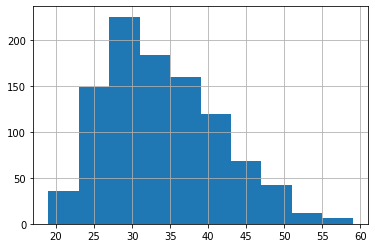

In [110]:
boston.Age.hist()

It looks like most runners are clustered aroung the 20s through mid-30s, but there is a fairly long tail to the right (that is, the data is skewed to the right).

## Bonus: Parsing Indicators with `get_dummies()`

In this lecture we'll introduce a method that creates *indicator* variables out of *categorical* variables stored as text.

Examining our `boston` dataframe, we see we have a column called "Years Ran". This column contains information regarding whether the runner participated in the preceding two Boston marathons (2015 and 2016)

In [111]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson


Let's extract all of the runners who ran in at least one of the two preceding events.

In [112]:
boston[boston['Years Ran'].notnull()]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson
12,"Keflezighi, Meb",41,M,San Diego,CA,USA,2:17:00,13,13,2015,Keflezighi,Meb
13,"Nyasango, Cutbert",34,M,Harara,NaN,ZIM,2:17:40,14,14,2016,Nyasango,Cutbert
14,"Korir, Wesley",34,M,Kitale,NaN,KEN,2:18:14,15,15,2015:2016,Korir,Wesley
29,"Maravilla, Jorge",39,M,Mill Valley,CA,USA,2:24:27,30,27,2016,Maravilla,Jorge
...,...,...,...,...,...,...,...,...,...,...,...,...
986,"Bretz, Virgil",44,M,Mt. Kisco,NY,USA,2:56:02,987,931,2015:2016,Bretz,Virgil
987,"Cucuzzella, Mark",50,M,Shepherdstown,WV,USA,2:56:03,988,932,2016,Cucuzzella,Mark
988,"Carron, John B",46,M,Irvington,NY,USA,2:56:03,989,933,2016,Carron,John B
995,"Larosa, Mark",38,M,North Andover,MA,USA,2:56:06,996,940,2015:2016,Larosa,Mark


So we have 315 runners who participated in one or both of the previous two marathons. If the runner participated in both years, the years are listed separated by a colon.

Let's take a look at the different values that are present in the "Years Run" column

In [113]:
boston['Years Ran'].unique()

array([nan, '2015', '2016', '2015:2016'], dtype=object)

We see here that "Years Ran" has one of four values:
1. NaN - indicating that this year (2017) is the first year that this person is participating in the marathon
2. 2015 - indicating that the runner also ran the 2015 marathon but not the 2016 marathon
3. 2016 - indicating that the runner also ran the 2016 but not the 2015 marathon
4. 2015:2016 - indicating that the runner ran both the 2015 and 2016 events in addition to the current 2017 event

The non-NaN values are all categorical, stored as text. It is fine to store data this way, but it may not be the most useful for data analysis. Rather, a data analyst might split this into two separate columns called "2015" and "2016" with boolean or binary values indicating whether the runner participated in those years.

In Pandas, it is very easy to convert these categorical variables into binary values. There is a dedicated method called `get_dummies()`, so-named because **dummy variables** are another name for indicator variables. 
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.get_dummies.html

Let's go ahead and do this for our marathon "Years Ran" data. All we need to do is call `str.get_dummies()` on our "Years Ran" data and pass in the string separator that separates the years run.

In [114]:
boston['Years Ran'].str.get_dummies(':')

,2015,2016
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
995,1,1
996,1,0
997,0,0
998,0,0


This returns a dataframe with two separate binary columns indicating whether that row corresponds to a runner who ran in 2015, 2016, or both. This allows us to deal with numerical analysis much more cleanly.

Let's store this dataframe as a variable that we can use later on.

In [115]:
dummies = boston['Years Ran'].str.get_dummies(':')

Unfortunately this conversion cannot be done in place. We have to manually add these new columns into our dataframes. We'll do this using the `insert()` method that we learned previously.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html

Where do we want to make this insertion? We need to know this so that we can tell the `insert()` method where to place the new columns. Generally speaking, it's not good practice to hard-code insertions because the indices/positions of columns and rows may change as the dataframe is modified. Instead, we'll use the `get_loc()` method on the columns array.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.get_loc.html

In [116]:
boston.insert(loc = boston.columns.get_loc("Years Ran"), column = "Ran 2015", value = dummies["2015"])

In [117]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,0,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,0,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,0,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,0,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,1,2015,Chebet,Wilson


Let's do the same for the year 2016.

In [118]:
boston.insert(loc = boston.columns.get_loc("Years Ran"), column = "Ran 2016", value = dummies["2016"])

In [119]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,0,0,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,0,0,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,0,0,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,0,0,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,1,0,2015,Chebet,Wilson


Now it is much easier to answer certain questions. For example, *Which top runners from 2017 also ran in the previous two Boston marathons?* This is easy to answer using a dual-conditional boolean statement and a selection.

In [120]:
boston[(boston["Ran 2015"] == 1) & (boston["Ran 2016"] == 1)]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran,Last Name,First Name
14,"Korir, Wesley",34,M,Kitale,NaN,KEN,2:18:14,15,15,1,1,2015:2016,Korir,Wesley
30,"Ornelas, Zachary",25,M,Ann Arbor,MI,USA,2:24:40,31,28,1,1,2015:2016,Ornelas,Zachary
31,"Ayr, Jason M.",29,M,Allston,MA,USA,2:24:49,32,29,1,1,2015:2016,Ayr,Jason M.
36,"Vangampleare, Stephen",26,M,Colorado Springs,CO,USA,2:25:35,37,33,1,1,2015:2016,Vangampleare,Stephen
56,"Boudalia, Said Sr.",48,M,Belluno,NaN,ITA,2:30:11,57,51,1,1,2015:2016,Boudalia,Said Sr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,"Yu, Michael",45,M,"Zhubei City, Hsinchu County",NaN,TWN,2:55:40,960,907,1,1,2015:2016,Yu,Michael
962,"Husak, Tyler",30,M,Marion,IA,USA,2:55:42,963,910,1,1,2015:2016,Husak,Tyler
977,"Guthals, Nathaniel",26,M,Overland Park,KS,USA,2:55:57,978,923,1,1,2015:2016,Guthals,Nathaniel
986,"Bretz, Virgil",44,M,Mt. Kisco,NY,USA,2:56:02,987,931,1,1,2015:2016,Bretz,Virgil


In this particular example, the same result could be achieved by specifying the categorical value associated with runners who ran in 2015 and 2016:

In [121]:
boston[boston["Years Ran"] == "2015:2016"]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran,Last Name,First Name
14,"Korir, Wesley",34,M,Kitale,NaN,KEN,2:18:14,15,15,1,1,2015:2016,Korir,Wesley
30,"Ornelas, Zachary",25,M,Ann Arbor,MI,USA,2:24:40,31,28,1,1,2015:2016,Ornelas,Zachary
31,"Ayr, Jason M.",29,M,Allston,MA,USA,2:24:49,32,29,1,1,2015:2016,Ayr,Jason M.
36,"Vangampleare, Stephen",26,M,Colorado Springs,CO,USA,2:25:35,37,33,1,1,2015:2016,Vangampleare,Stephen
56,"Boudalia, Said Sr.",48,M,Belluno,NaN,ITA,2:30:11,57,51,1,1,2015:2016,Boudalia,Said Sr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,"Yu, Michael",45,M,"Zhubei City, Hsinchu County",NaN,TWN,2:55:40,960,907,1,1,2015:2016,Yu,Michael
962,"Husak, Tyler",30,M,Marion,IA,USA,2:55:42,963,910,1,1,2015:2016,Husak,Tyler
977,"Guthals, Nathaniel",26,M,Overland Park,KS,USA,2:55:57,978,923,1,1,2015:2016,Guthals,Nathaniel
986,"Bretz, Virgil",44,M,Mt. Kisco,NY,USA,2:56:02,987,931,1,1,2015:2016,Bretz,Virgil


However, as we'll see, this has its disadvantages when it comes to performing certain operations on the data.

For example, suppose we wanted to determine *How many top runners from 2017 also ran in 2015?* We can approach this using the `sum()` method.

In [122]:
boston[boston["Ran 2015"] == 1]["Ran 2015"].sum()

190

Note that the `sum()` method works in this case because the column "Ran 2015" contains numerical values. It would not have worked if that column still contained string values. In that case, we would have had to rely on some awkward workaround like using `.count()`.

## Text Replacement with `replace()` and `str.replace()`

**String replacements** are common operations that are useful for transforming, cleaning, and reshaping text data. In this lecture we'll focus on replacements with exact character sequences (regular expressions will come later).

Let's modify our `s` string to enable more things to be done with it.

In [123]:
s += '. This section is about text.'

In [124]:
s

'Welcome to the text manipulation section. This section is about text.'

We've seen how replacement works. We need two parameters.
1. The string that we want to find and replace.
2. The replacement string that will be substituted in for the string that we're replacing.

In [125]:
s.replace('text', 'string')

'Welcome to the string manipulation section. This section is about string.'

Notice how all instances of "text" have been replaced with "string". There's also a parameter called `max()` that limits the number of replacements made. Note that `max()` is NOT a KWARG.
* https://www.tutorialspoint.com/python/string_replace.htm

In [126]:
s.replace('text', 'string', 1)

'Welcome to the string manipulation section. This section is about text.'

Replacement carries over nicely to Pandas, where it has even more functionality. Let's output some random records to work with.

In [127]:
boston.sample(10)

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran,Last Name,First Name
142,"Brigham, Nathan E",34,M,Baltimore,MD,USA,2:38:05,143,126,0,0,NaN,Brigham,Nathan E
969,"Murphy, Timothy A.",45,M,Ronkonkoma,NY,USA,2:55:52,970,917,0,1,2016,Murphy,Timothy A.
526,"Swenson, Will",45,M,Andover,MA,USA,2:49:10,527,490,1,1,2015:2016,Swenson,Will
937,"Sitarz, Hans",22,M,Birmingham,AL,USA,2:55:22,938,887,0,0,NaN,Sitarz,Hans
393,"Jones, Matthew",28,M,London,NaN,GBR,2:46:23,394,364,0,0,NaN,Jones,Matthew
357,"Sarkovics, Rodney",46,M,Fishers,IN,USA,2:45:38,358,331,0,0,NaN,Sarkovics,Rodney
377,"Brewer, Bo",28,M,Dunwoody,GA,USA,2:46:05,378,349,0,0,NaN,Brewer,Bo
938,"Dimbleby, Peter J.",42,M,Walsall,NaN,GBR,2:55:23,939,888,0,0,NaN,Dimbleby,Peter J.
739,"Loveland, Eric C",27,M,Dundee,MI,USA,2:52:44,740,697,0,0,NaN,Loveland,Eric C
785,"Lin, Mason",21,M,Davidson,NC,USA,2:53:20,786,740,0,0,NaN,Lin,Mason


Suppose we want to modify the "M/F" column to replace "M" with "Male" and "F" with "Female". 

One way to do this is to select the column and invoke the `str.replace()` method.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html

In [128]:
boston['M/F'].str.replace('F', "Female")

0      M
1      M
2      M
3      M
4      M
      ..
995    M
996    M
997    M
998    M
999    M
Name: M/F, Length: 1000, dtype: object

It's difficult to see whether this had an effect because most of the top runners are male. Let's tag on a `value_counts()` to see if it worked.

In [129]:
boston['M/F'].str.replace('F', "Female").value_counts()

M         944
Female     56
Name: M/F, dtype: int64

Indeed it did! 

Now, what do we do about the "M" replacements? All we need to do is tag on another call to `str.replace()`.

In [130]:
boston['M/F'].str.replace('F', "Female").str.replace('M', 'Male').value_counts()

Male      944
Female     56
Name: M/F, dtype: int64

Unfortunately there is no `inplace` parameter here, so in order to save this new series into our dataframe we'll need to directly save the new column back to the dataframe.

In [131]:
boston['M/F'] = boston['M/F'].str.replace('F', "Female").str.replace('M', 'Male')

In [132]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,Male,Keringet,NaN,KEN,2:09:37,1,1,0,0,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,Male,Portland,OR,USA,2:09:58,2,2,0,0,NaN,Rupp,Galen
2,"Osako, Suguru",25,Male,Machida-City,NaN,JPN,2:10:28,3,3,0,0,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,Male,Mammoth Lakes,CA,USA,2:12:08,4,4,0,0,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,Male,Marakwet,NaN,KEN,2:12:35,5,5,1,0,2015,Chebet,Wilson


The Pandas version of `replace()` also supports case-sensitivity/insensitivity.

Let's work with the "Country" column and replace "USA" with "United States".

In [133]:
boston.Country.str.replace("USA", 'United States')

0                KEN
1      United States
2                JPN
3      United States
4                KEN
           ...      
995    United States
996    United States
997    United States
998    United States
999    United States
Name: Country, Length: 1000, dtype: object

Simple enough. But what if we made a small type in "USA", for instance:

In [134]:
boston.Country.str.replace("UsA", 'United States')

0      KEN
1      USA
2      JPN
3      USA
4      KEN
      ... 
995    USA
996    USA
997    USA
998    USA
999    USA
Name: Country, Length: 1000, dtype: object

The replacement totally breaks down because the generic form of `replace()` looks for *exact* character matches. With the lower-case "s" in "UsA", there is no match.

We can tell Pandas to be case-insensitive by setting the `case` parameter to `False`.

In [135]:
boston.Country.str.replace("UsA", 'United States', case = False)

0                KEN
1      United States
2                JPN
3      United States
4                KEN
           ...      
995    United States
996    United States
997    United States
998    United States
999    United States
Name: Country, Length: 1000, dtype: object

## An Introduction to Regular Expressions

Regular Expressions (or regex) allow us to create patterns to search for and replace text. It is not Python-specific and can be used in any programming language that supports regex.

We can use regex101 [regex101](https://regex101.com) as our regex playground where we'll play around with regex and become more familiar with it. This website provides a very useful regex engine as well as a quick reference guide that shows the most commonly used pattern characters.

A few notes on regex:
* There are oftentimes multiple ways to create a regex pattern that will get you to a solution you want
* Capturing groups in regex can be referred to using numbered back-references, which can we used to recall those captured strings
* Anchors control word and line boundaries
* Sometimes it is much easier to Google regex patterns and grab one that someone has already made and is highly upvoted (e.g. on StackExchange)
* Regex gets a lot easier to use with practice




## Regex Practice in Python: `re.findall()`, `re.sub()`, `re.match()`, `re.compile()`

In this lecture, we'll explore the following topics:
* The `re` module in Python 
* Regular expressions in email addresses
* pitfalls of regex
* additional resources: https://emailregex.com

The `re` module in Python provides access to all Python regex functionality.
* https://docs.python.org/3/library/re.html

In [136]:
import re

There are several ways to use regex in Python. But perhaps the best place to start is to *define a pattern* that we want to search for.

Let's take the example of an email address. What do we need in an email?
* any word character(s)
* any non-whitespace character(s)
* an @ sign
* another word or digit character(s)
* an end of line

We've created a potential email regex on regex101.com. Let's bring it over.


In [137]:
pattern = r"\w\S*@.*\w"

Note the preceding `r` in the code, indicating that this is a raw string. This indicates that all backslashes are to be interpreted literally, and not as escapes.

Now that we've created out pattern, we can now use the plethora of `re` methods to perform regex activities. For example, we can use `re.findall()` to obtain all non-overlapping matches of that pattern in a string.

In [138]:
re.findall(pattern, 'andy@howtopandas.com')

['andy@howtopandas.com']

What returns is a Python list of all matches!

What happens if we remove the characteris in front of the domain?

In [139]:
re.findall(pattern, '@howtopandas.com')

[]

We get an empty string back because our pattern no longer matches anything in the string.

Let's try something more advanced. Some email addresses disclose the domain name but not the characters preceding it. Let's use regex to anonymize our emails so that they look like ****@gmail.com*. Here's what we'll do:
1. Start with an actual valid email
2. Capture the domain part of the email (the part we want to show)
3. Replace everything else besides the domain with asterisks

Let's start with our email.

In [140]:
email = 'andy@howtopandas.com'

Now let's create a pattern (created at regex101). Remember, all we need to do is add parentheses around the part of the pattern that we want to capture into a group.

In [141]:
pattern = r'\w\S*(@.*\w)'

Finally, we'll use `re.sub()` to make the substitution. We pass in the pattern as well as the *repl*, which is the structure that we want to replace the pattern with. Finally, we pass in the actual string that we want to assess, in this case `email`.

What this says is the following: search `email` for the regex in `pattern`. Once found, replace the match with asterisks followed by the first captured group from the pattern.

In [142]:
re.sub(pattern, r'*******\1', email)

'*******@howtopandas.com'

Let's try out this crazy regex pattern from https://emailregex.com/. Note the use of the `re.compile()` method, which compiles a regular expression pattern and returns a **pattern object** that can be used in methods like `match()` and `search()`.
* Compiled regular expression objects support their own methods and attributes. Refer to the Python regex page for more info: https://docs.python.org/3/library/re.html

In [143]:
robust_pattern = re.compile(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", re.UNICODE)

Now let's test it. First, we'll create an invalid email address.

In [144]:
email2 = "andy@andy@andy.com"

Now let's test this email against our earlier, simplistic search pattern.

In [145]:
re.findall(pattern, email2)

['@andy.com']

We see that it works! Even though the email is invalid, our simplistic search pattern nevertheless matches the ending of it.

What about our original pattern without the capturing group?

In [146]:
re.findall(r"\w\S*@.*\w", email2)

['andy@andy@andy.com']

In that case, our entire invalid email is a match! So clearly our simplistic pattern doesn't make the cut.

How does the robust pattern from emailregex.com do?

In [147]:
re.findall(robust_pattern, email2)

[]

The robust pattern knows that `email2` is invalid. This illustrates why it is often a better use of time to find more robust regex patterns that are already available for more complex patters, rather than making your own. The instructor recommends verifying homemade regex expressions with the community or with subject matter experts.

## Bonus: What's the point of `re.compile()`?

In previous lectures, we've run regular expression searchers using raw text patterns as well as compiled patterns. Compiled patterns utilized the `re.compile()` method
* https://docs.python.org/3/library/re.html#re.compile

What is the difference between these two? Why do we need to compile at all? 

In modern Python, there's not much of a difference between a raw pattern and a compile pattern. Let's define both of them explicity.

In [148]:
compiled_pattern = re.compile(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)")

In [149]:
raw_pattern = r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)"

Now let's assemble a list of emails to test.

In [150]:
emails = ['andy@andy@andy@andy.com', 'andy@howtopandas.com', 'superinvalid|ha.com', 'hey@andybek.com']

Using list comprehension, we'll loop through this list and use the `re.match()` method together with teither the raw pattern or the compiled pattern.

In [151]:
[re.match(raw_pattern, email) for email in emails]

[None,
 <re.Match object; span=(0, 20), match='andy@howtopandas.com'>,
 None,
 <re.Match object; span=(0, 15), match='hey@andybek.com'>]

In [152]:
[re.match(compiled_pattern, email) for email in emails]

[None,
 <re.Match object; span=(0, 20), match='andy@howtopandas.com'>,
 None,
 <re.Match object; span=(0, 15), match='hey@andybek.com'>]

As you can see, they return the exact same result. For the match method it does not matter which pattern we use. So what is the difference?

To summarize:
* In the days of olde, `re.compile()` used to cach the regex, making execution and accession and pattern matching much faster.
* Since Python 2+, the pattern is compiled and cached automatically by `re` methods
* Automatic caching occurs for a maximum of about 100 regex patterns by default
* So, if you're working with more than 100 regex patterns and need to access them frequently, then it would behoove you to compile the patterns.

## Pandas `str.contains()`, `str.split()`, and `str.replace()` methods with regex

We now return to Pandas and see how to we can use regex to make Pandas `str` methods more powerful and useful. In this lecture we'll revisit `str.contains()`, `str.split()`, and `str.replace()` with regex.

In [153]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,Male,Keringet,NaN,KEN,2:09:37,1,1,0,0,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,Male,Portland,OR,USA,2:09:58,2,2,0,0,NaN,Rupp,Galen
2,"Osako, Suguru",25,Male,Machida-City,NaN,JPN,2:10:28,3,3,0,0,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,Male,Mammoth Lakes,CA,USA,2:12:08,4,4,0,0,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,Male,Marakwet,NaN,KEN,2:12:35,5,5,1,0,2015,Chebet,Wilson


Remember that Python does not have a contains method, but Pandas does. Instead of search for literal strings using `str.contains()`, we can use regex!
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html

In [154]:
boston.Name[boston.Name.str.contains(r'Will', regex = True)]

93            Vanos, William
199        Guzick, William F
415          Hartje, William
429         Adams, William C
456              Cunha, Will
526            Swenson, Will
571    Gates, William E. Jr.
711       Swanson, William G
814        Williamson, David
835             Vargas, Will
892             Rivera, Will
897      Feldman, William P.
936      Decamps, William M.
939        Versen, William R
996      Williamson, Jerry A
Name: Name, dtype: object

That result is no different than doing a normal `contains()` call on "Will". However, with regex enabled we now have more flexibility for what we search for.

For example, what if we want to search for both upper- and lower-case verions of "Will". All we have to do is this:

In [155]:
boston.Name[boston.Name.str.contains(r'[Ww]ill', regex = True)]

93            Vanos, William
199        Guzick, William F
415          Hartje, William
429         Adams, William C
456              Cunha, Will
526            Swenson, Will
571    Gates, William E. Jr.
711       Swanson, William G
814        Williamson, David
835             Vargas, Will
892             Rivera, Will
897      Feldman, William P.
936      Decamps, William M.
939        Versen, William R
996      Williamson, Jerry A
Name: Name, dtype: object

There was no difference in this example because there are no instances of lowercase "Will".

We see here that our search returned any and all names that contain "Will" in it, including "Williamson" and "William". What if we wanted to tighten our search to return only those whose first name is exactly "Will"? To achieve this, we can modify our pattern to include a whitespace in front of the name (which separates the last name from the first name), and then anchor the name so that the end of the string must end with "Will".

In [156]:
boston.Name[boston.Name.str.contains(r'\sWill$', regex = True)]

456      Cunha, Will
526    Swenson, Will
835     Vargas, Will
892     Rivera, Will
Name: Name, dtype: object

And what if we wanted both "Will"s and "William"s? We can do that as well.

In [157]:
boston.Name[boston.Name.str.contains(r'\sWill(?:iam)?$', regex = True)]

93      Vanos, William
415    Hartje, William
456        Cunha, Will
526      Swenson, Will
835       Vargas, Will
892       Rivera, Will
Name: Name, dtype: object

There may also be runners who have middle initials after "Will", that we don't capture with our pattern because of the anchor. We can further edit our pattern to account for that, allowing for an additional whitespace and word character.
* In this case we have no such runners

In [158]:
boston.Name[boston.Name.str.contains(r'\sWill\s?\w?$', regex = True)]

456      Cunha, Will
526    Swenson, Will
835     Vargas, Will
892     Rivera, Will
Name: Name, dtype: object

An alternative would be to use the word boundary token instead, which simply indicates that the word "Will" ends. Any name that has a "Will" ending in a whitespace will be matched.

In [159]:
boston.Name[boston.Name.str.contains(r'\sWill\b', regex = True)]

456      Cunha, Will
526    Swenson, Will
835     Vargas, Will
892     Rivera, Will
Name: Name, dtype: object

Let's modify one of the names so that we can see our changes in action, since no runners currently make use of the edits.

In [160]:
boston.iat[835, 0] += ' J.'

Now let's try our regex search again.

In [161]:
boston.Name[boston.Name.str.contains(r'\sWill\b', regex = True)]

456        Cunha, Will
526      Swenson, Will
835    Vargas, Will J.
892       Rivera, Will
Name: Name, dtype: object

Moving on to `str.split()`, recall that we use this to split on a string of our choosing.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html

Let's split the names on whitespace, which is the default behavior:


In [162]:
boston.Name.str.split(expand = True)

,0,1,2,3,4
0,"Kirui,",Geoffrey,None,None,None
1,"Rupp,",Galen,None,None,None
2,"Osako,",Suguru,None,None,None
3,"Biwott,",Shadrack,None,None,None
4,"Chebet,",Wilson,None,None,None
...,...,...,...,...,...
995,"Larosa,",Mark,None,None,None
996,"Williamson,",Jerry,A,None,None
997,"Mccue,",Daniel,T,None,None
998,"Larosa,",John,None,None,None


We can also split using regex. Note that regex is recognized by default as long as we pass in a raw string (using the "r" prefix); we do not have to explicity turn it on like we did with `str.contains()`.

In [163]:
boston.Name.str.split(r'\s', expand = True)

,0,1,2,3,4
0,"Kirui,",Geoffrey,None,None,None
1,"Rupp,",Galen,None,None,None
2,"Osako,",Suguru,None,None,None
3,"Biwott,",Shadrack,None,None,None
4,"Chebet,",Wilson,None,None,None
...,...,...,...,...,...
995,"Larosa,",Mark,None,None,None
996,"Williamson,",Jerry,A,None,None
997,"Mccue,",Daniel,T,None,None
998,"Larosa,",John,None,None,None


Finally, we revisit `str.replace()` using regex. To practice this, let's take the "Official Time" column and express it in a longer form (currently in H:MM:SS). We want to go to something like "2 hours, 9 minutes, 37 seconds", as a human might read it.

In [164]:
boston['Official Time'].head()

0    2:09:37
1    2:09:58
2    2:10:28
3    2:12:08
4    2:12:35
Name: Official Time, dtype: object

What's the plan here? We'll capture the different components of the time, then re-insert those components with the modified strings that we want.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html

In this case, we have a single hour digit, followed by a colon, followed by two minute digits, followed by a colon, followed by two second digits. There are multiple ways to express this in a regex pattern, but we'll use curly brace quantifiers for now. Then we'll spit out those captured groups and add in our descriptor text.

In [165]:
boston['Official Time'].str.replace(r'(\d):(\d{2}):(\d{2})', r'\1 hours, \2 minutes, \3 seconds')

0      2 hours, 09 minutes, 37 seconds
1      2 hours, 09 minutes, 58 seconds
2      2 hours, 10 minutes, 28 seconds
3      2 hours, 12 minutes, 08 seconds
4      2 hours, 12 minutes, 35 seconds
                    ...               
995    2 hours, 56 minutes, 06 seconds
996    2 hours, 56 minutes, 06 seconds
997    2 hours, 56 minutes, 06 seconds
998    2 hours, 56 minutes, 07 seconds
999    2 hours, 56 minutes, 08 seconds
Name: Official Time, Length: 1000, dtype: object

The last step would be to assign this series back to the dataframe since there is no `inplace` parameter for `replace`, but we won't do that explicitly here.

## Skill Challenge #2

#### 1. Split the "Official Time" column into three separate columns; one each for hours, minutes, and seconds. Store this dataframe in a variable called `final_times`.

We can use the `str.split()` method and split the "Official Time" column into individual components.

First, let's remind ourselves what that column looks like.

In [166]:
boston['Official Time']

0      2:09:37
1      2:09:58
2      2:10:28
3      2:12:08
4      2:12:35
        ...   
995    2:56:06
996    2:56:06
997    2:56:06
998    2:56:07
999    2:56:08
Name: Official Time, Length: 1000, dtype: object

The time values are split by colons. Let's use that to perform our split, ensuring to expand the values into its own dataframe. 

In [167]:
boston['Official Time'].str.split(':', expand = True)

,0,1,2
0,2,09,37
1,2,09,58
2,2,10,28
3,2,12,08
4,2,12,35
...,...,...,...
995,2,56,06
996,2,56,06
997,2,56,06
998,2,56,07


Perfect. Let's now save this as the variable `final_times` per the directions.

In [168]:
final_times = boston['Official Time'].str.split(':', expand = True)

#### 2. In the `final_times` dataframe, create a new column called "total" that contains the total time in seconds. Add this "total" column to the `boston` dataframe.

There's a lot that can go into this bit. We're going to need to do a few things here:
1. The values are currently object datatypes (strings). We will need to convert the times from object datatypes to numerical datatypes.
2. We will need to convert the values in the hours and minutes columns to seconds.
3. We will need to sum the values across all three columns and save that value as a column called "total".
4. We will need to append the new "total" column to the `boston` dataframe.

Let's take this one step at a time, starting with the datatype conversion. Because we're only dealing with whole numbers here, we'll cast the data into `np.int64` datatypes.



In [169]:
final_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   object
 2   2       1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [170]:
final_times = final_times.astype(np.int64)

In [171]:
final_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   int64
 1   1       1000 non-null   int64
 2   2       1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [172]:
final_times

,0,1,2
0,2,9,37
1,2,9,58
2,2,10,28
3,2,12,8
4,2,12,35
...,...,...,...
995,2,56,6
996,2,56,6
997,2,56,6
998,2,56,7


Next, we need to convert the values in the hours ("0") and minutes ("1") columns into seconds. Simply enough, we'll just apply a multiplier function to those two series and then replace the existing object columns with these numerical columns.

In [173]:
final_times[0] = final_times[0] * 3600

In [174]:
final_times[1] = final_times[1] * 60

In [175]:
final_times

,0,1,2
0,7200,540,37
1,7200,540,58
2,7200,600,28
3,7200,720,8
4,7200,720,35
...,...,...,...
995,7200,3360,6
996,7200,3360,6
997,7200,3360,6
998,7200,3360,7


Finally, let's do a `sum()` across all of the columns.

In [176]:
final_times.sum(axis = 1)

0       7777
1       7798
2       7828
3       7928
4       7955
       ...  
995    10566
996    10566
997    10566
998    10567
999    10568
Length: 1000, dtype: int64

Excellent. Let's append this to the `final_times` and `boston` dataframes as "total".

In [177]:
total = final_times.sum(axis = 1)

In [178]:
final_times['total'] = total

In [179]:
final_times

,0,1,2,total
0,7200,540,37,7777
1,7200,540,58,7798
2,7200,600,28,7828
3,7200,720,8,7928
4,7200,720,35,7955
...,...,...,...,...
995,7200,3360,6,10566
996,7200,3360,6,10566
997,7200,3360,6,10566
998,7200,3360,7,10567


For inserting into Boston, we'll do a dynamic insertion using `.insert()` and specify the location as being adjacent to the existing "Official Time" column using `get_loc()`, as it probably makes the most sense there.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.get_loc.html

In [180]:
boston.insert(boston.columns.get_loc('Official Time')+1, "Total Time", total)

In [181]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Total Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,Male,Keringet,NaN,KEN,2:09:37,7777,1,1,0,0,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,Male,Portland,OR,USA,2:09:58,7798,2,2,0,0,NaN,Rupp,Galen
2,"Osako, Suguru",25,Male,Machida-City,NaN,JPN,2:10:28,7828,3,3,0,0,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,Male,Mammoth Lakes,CA,USA,2:12:08,7928,4,4,0,0,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,Male,Marakwet,NaN,KEN,2:12:35,7955,5,5,1,0,2015,Chebet,Wilson


#### 3. Do the runners in the `boston` dataset who also ran in 2016 have a higher or lower average time than everyone else?

To be more precise, we're trying to figure out if people who ran two consecutive marathons (2016 and 2017) complete it more quickly on average. The instructor hypothesizes that those who run multiple marathons are probably faster (he admits it is a bad hypothesis). 

Remember the "Ran 2016" column that we had from earlier. We can use this to our advantage to group our data. Let's start by creating a boolean column that determines where a given runner from the 2017 marathon also ran in 2016.

In [185]:
ran_2016 = boston['Ran 2016'] == 1

In [186]:
ran_2016

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998    False
999    False
Name: Ran 2016, Length: 1000, dtype: bool

Now we can use this mask to select those 2016 runners. We will also calculate the mean value of the "Total Time" column for those runners.

In [189]:
boston.loc[ran_2016, 'Total Time'].mean()

10043.12048192771

Awesome. Now let's evaluate those who did NOT run the 2016 marathon. The easiest way is to jus use the bitwise NOT (complement) operator `~` to negate the existing `ran_2016` boolean mask.
* https://www.tutorialspoint.com/What-is-tilde-operator-in-Python

In [191]:
boston.loc[~ran_2016, 'Total Time'].mean()

9966.195739014647

Well well, it looks like those who did not run in 2016 actually had a LOWER average total time than those who did run in 2016. Interesting! However, the times are quite close, and we can't be sure that it's actually statistically significant.